In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#create an array of periods and find median

periods = np.array([])
q = 7
s = 1

while q <= 15:
    s = 1
    while s <= 3:

        if q < 10:
            qs = '_q0' + str(q) + '_' + str(s)

        else:
            qs = '_q' + str(q) + '_' + str(s)

        df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

        periods = np.append(periods,df.iloc[-3,1])

        s = s + 1

    q = q + 1


In [4]:
#workout which ttv we are setting as the period and transit 0

i = 0

#note this only works for odd -> break into odd and even cases
while i < len(periods)-1:
    if periods[i] == np.median(periods):
        break

    i = i + 1

q = int(i/3) + 7
s = 1 + i%3

if q < 10:
    qs = '_q0' + str(q) + '_' + str(s)

else:
    qs = '_q' + str(q) + '_' + str(s)

df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

P_p1 = periods[i]
t0_p1 = df.iloc[-1,1]

print(t0_p1,P_p1,qs)

1156.0856562703 1.4342177278 _q12_3


In [5]:
#create an array of estimated transit times
transit_times = np.array([])
transit_numbers = np.array([])

q07_1 = pd.read_csv('KIC4150611_TTV_q07_1/posteriors.dat', delimiter="\t \t", engine = "python")
q15_3 = pd.read_csv('KIC4150611_TTV_q15_3/posteriors.dat', delimiter="\t \t", engine = "python")


while t0_p1 > q07_1.iloc[10,1]:
    t0_p1 = t0_p1 - P_p1

transit_times = np.append(transit_times,t0_p1)

while t0_p1 < q15_3.iloc[-4,1]:
    t0_p1 = t0_p1 + P_p1
    transit_times = np.append(transit_times,t0_p1)

print(transit_times,len(transit_times))

[ 631.1619679   632.59618562  634.03040335  635.46462108  636.89883881
  638.33305653  639.76727426  641.20149199  642.63570972  644.06992745
  645.50414517  646.9383629   648.37258063  649.80679836  651.24101608
  652.67523381  654.10945154  655.54366927  656.977887    658.41210472
  659.84632245  661.28054018  662.71475791  664.14897563  665.58319336
  667.01741109  668.45162882  669.88584655  671.32006427  672.754282
  674.18849973  675.62271746  677.05693519  678.49115291  679.92537064
  681.35958837  682.7938061   684.22802382  685.66224155  687.09645928
  688.53067701  689.96489474  691.39911246  692.83333019  694.26754792
  695.70176565  697.13598337  698.5702011   700.00441883  701.43863656
  702.87285429  704.30707201  705.74128974  707.17550747  708.6097252
  710.04394292  711.47816065  712.91237838  714.34659611  715.78081384
  717.21503156  718.64924929  720.08346702  721.51768475  722.95190247
  724.3861202   725.82033793  727.25455566  728.68877339  730.12299111
  731.557

In [6]:
#aggregate other times -> compare observed times with calculated times -> if within certain range -> jot down transit number -> get an array of transit numbers


o_minus_c = np.array([])
q = 7
j = 0


while q <= 15:
    s = 1

    while s <= 3:

        if q < 10:
            qs = '_q0' + str(q) + '_' + str(s)

        else:
            qs = '_q' + str(q) + '_' + str(s)

        df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

        i = 10

        while df.iloc[i,1] != df.iloc[-3,1]:

            while abs(df.iloc[i,1]-transit_times[j]) > 0.0375:
                j = j + 1
                print(df.iloc[i,1]-transit_times[j])

            o_minus_c = np.append(o_minus_c,24*60*(df.iloc[i,1]-transit_times[j]))
            transit_numbers = np.append(transit_numbers,j)
            i = i + 1

        s = s + 1

    q = q + 1

print(o_minus_c,transit_numbers)

0.006532736106464654
0.004056418606410261
0.004309532306365327
0.002969746606368062
0.016678848506330723
-0.0012722168937671086
0.002680069306165933
0.006362482906183686
0.004702738406081153
0.0029414725059950797
0.004111614106022898
0.0035454265059797763
0.002315954205869275
0.0021222155058922
0.0028625288058492515
0.0024520691057432487
0.00433669830567851
0.0036936085057277523
0.006218351005600198
0.010555736705555319
0.003285677705548551
0.005090071005497521
0.00035476670541356725
0.004068569805440347
1.4386023427053942
0.004384614905347917
-0.0014413032947686588
0.004156693405207079
0.0013825134051330679
0.005132610005148308
0.0050660404050404395
0.0025491130049886124
0.007003784504945543
0.005786987504961871
-0.0005398370950615572
0.003010016004850513
0.006027773104847256
0.00428458730470993
0.002058323804703832
0.005956712904662709
0.0008943371045688764
0.0030639796045761614
0.0028430477045731095
0.0027946934044393856
0.0025214341044375033
0.0038450026044074548
0.0041214071043214

In [7]:
transit_times_exist = P_p1*transit_numbers

print(transit_times_exist)

[  0.           1.43421773   2.86843546   4.30265318   5.73687091
   7.17108864   8.60530637  10.03952409  11.47374182  12.90795955
  14.34217728  15.77639501  17.21061273  18.64483046  20.07904819
  21.51326592  22.94748364  24.38170137  25.8159191   27.25013683
  28.68435456  30.11857228  31.55279001  32.98700774  34.42122547
  37.28966092  38.72387865  40.15809638  41.59231411  43.02653183
  44.46074956  45.89496729  47.32918502  48.76340275  50.19762047
  51.6318382   53.06605593  54.50027366  55.93449138  57.36870911
  58.80292684  60.23714457  61.6713623   63.10558002  64.53979775
  65.97401548  67.40823321  68.84245093  70.27666866  71.71088639
  73.14510412  74.57932185  76.01353957  77.4477573   78.88197503
  80.31619276  81.75041048  83.18462821  84.61884594  86.05306367
  87.4872814  104.69789413 106.13211186 107.56632958 110.43476504
 111.86898277 113.3032005  114.73741822 116.17163595 119.04007141
 120.47428914 123.34272459 124.77694232 127.64537777 129.0795955
 133.382248

/Users/james/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/james/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/james/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


"fig = plt.figure(figsize=(20,10))\nplt.scatter(transit_numbers,o_minus_c)\nplt.plot([-0.1,len(transit_times)],[0.,0],'--',linewidth=1,color='black',zorder=2)\nplt.xlim([-0.1,len(transit_times)])\nplt.xlabel('Transit number')\nplt.ylabel('O-C (minutes)')"

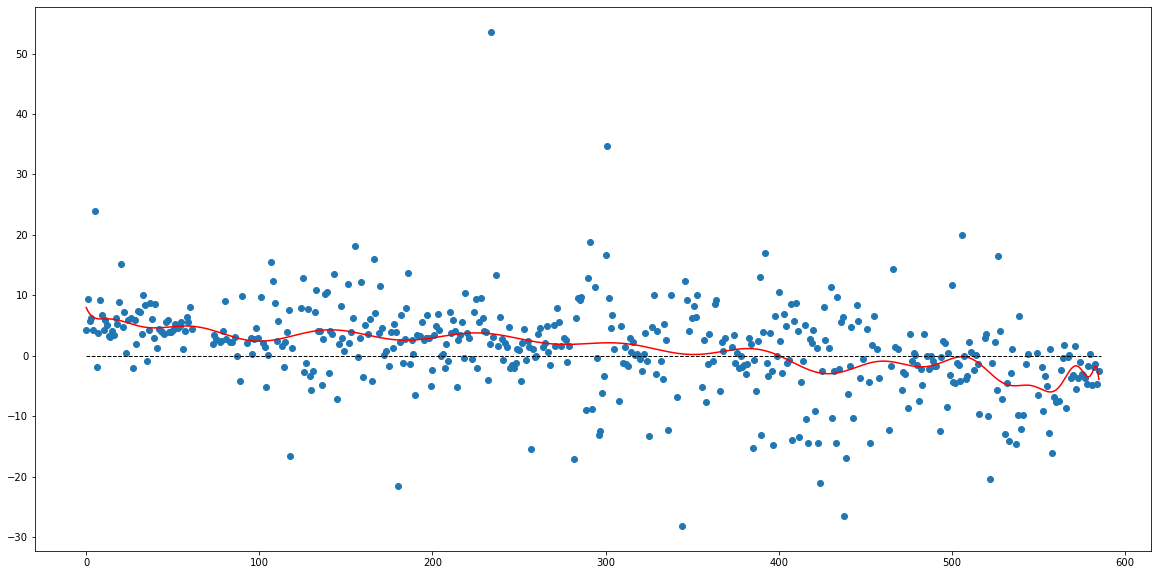

In [8]:



poly = np.poly1d(np.polyfit(transit_numbers,o_minus_c,111))
x = []
y = []


for i in range (len(transit_times)):
    x.append(i)
    y.append(poly(i))

fig = plt.figure(figsize=(20,10))


plt.plot(x,y,color='red')
plt.scatter(transit_numbers,o_minus_c)
plt.plot([-0.1,len(transit_times)],[0.,0],'--',linewidth=1,color='black',zorder=2)


'''fig = plt.figure(figsize=(20,10))
plt.scatter(transit_numbers,o_minus_c)
plt.plot([-0.1,len(transit_times)],[0.,0],'--',linewidth=1,color='black',zorder=2)
plt.xlim([-0.1,len(transit_times)])
plt.xlabel('Transit number')
plt.ylabel('O-C (minutes)')'''



[-7.30120093e-01 -1.05514685e-02  4.05149661e+01 -4.82376122e-01
  2.01897445e+00 -4.14630558e+01 -1.12559845e-02  6.18241168e+00]


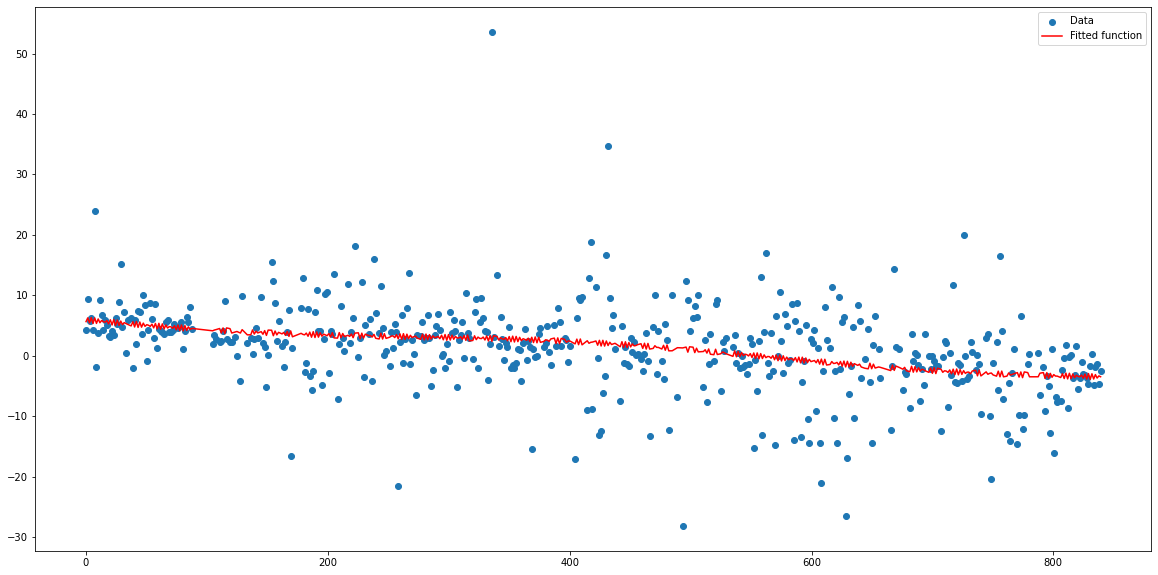

In [9]:
from scipy import optimize

from scipy import optimize

def test_func(x,a, b,c,d,e,f,g,h):
    return a * np.sin(b*x + c) + d*np.sin(e*x+f) + g*x +h

params, params_covariance = optimize.curve_fit(test_func, transit_times_exist, o_minus_c)
                                               #p0=[8, 2*np.pi/94.226,-100,8,2*np.pi/2000,0,1/40,0])

print(params)

plt.figure(figsize=(20, 10))
plt.scatter(transit_times_exist, o_minus_c, label='Data')
plt.plot(transit_times_exist, test_func(transit_times_exist,params[0], params[1],params[2], params[3], params[4],params[5],params[6],params[7]),
         label='Fitted function',color = 'red')

plt.legend(loc='best')

plt.show()
#sine model

#long term trends


[ 9.93523473e-01  6.17555910e-02 -4.98440598e+01  7.12707168e-01
  9.61803376e-03 -5.27124768e+01 -1.13106899e-02  6.15067653e+00]


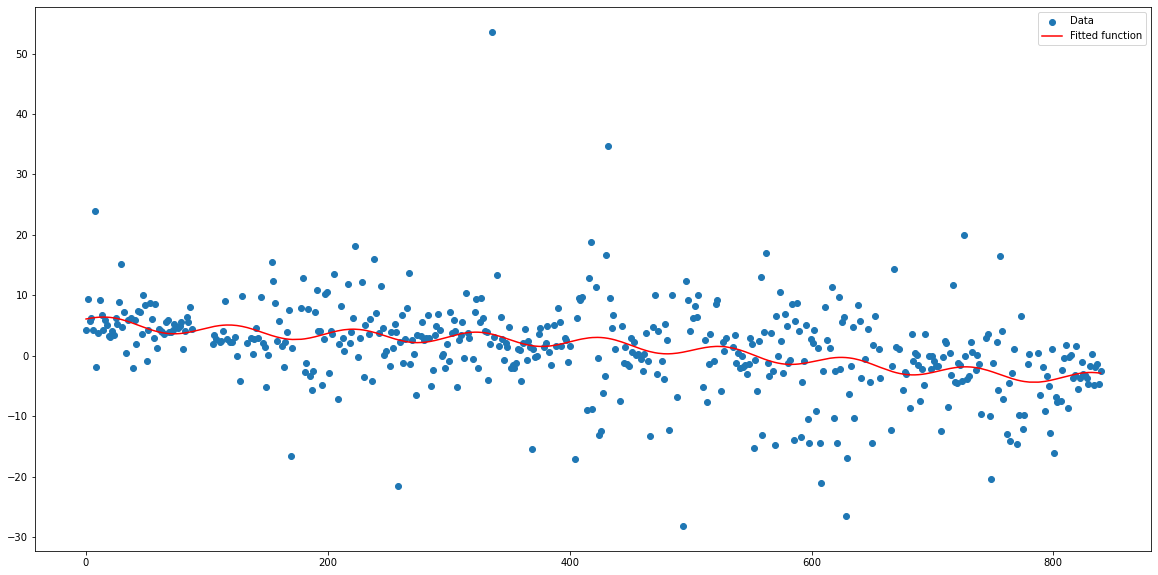

In [11]:
from scipy import optimize

from scipy import optimize

def test_func(x,a, b,c,d,e,f,g,h):
    return a * np.sin(b*x + c) + d*np.sin(e*x+f) + g*x +h

params, params_covariance = optimize.curve_fit(test_func, transit_times_exist, o_minus_c,
                                               p0=[8, 2*np.pi/94.226,-50,8,2*np.pi/2000,-50,1/40,0])

print(params)

plt.figure(figsize=(20, 10))
plt.scatter(transit_times_exist, o_minus_c, label='Data')
plt.plot(transit_times_exist, test_func(transit_times_exist,params[0], params[1],params[2], params[3], params[4],params[5],params[6],params[7]),
         label='Fitted function',color = 'red')

plt.legend(loc='best')

plt.show()
#sine model

#long term trends

In [11]:
help(optimize.curve_fit())

TypeError: curve_fit() missing 3 required positional arguments: 'f', 'xdata', and 'ydata'

In [26]:
SE = np.sqrt(np.diag(params_covariance))

print(SE)



[4.62331261e-01 2.56409719e-03 1.23136338e+00 4.32298191e-01
 3.74797391e-03 1.80544785e+00 1.26651501e-03 6.19516768e-01]
